In [1]:
#Redoing Figure 8 from the RDA paper (showcasing decadal changes in rainfall)

#uses the Pchina_type.nc data set created by RDA_precip_china_type.ipynb
#tests for significance of decadal changes in zonally averaged rainfall.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
from bootstrap import bs_resample, bs_resample_block, bs_stdofmean, bs_stdofmean_block, bs_means_diff, bs_means_diff_block

In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin/"
ff = "Pchina_type.nc"
filename = ferretpath + ff
myf = nc.Dataset(filename, 'r')

In [3]:
P_total =  myf.variables['Pchina_total'][:]
P_band = myf.variables['Pchina_band'][:]
P_local = myf.variables['Pchina_local'][:]

In [4]:
P_total.shape

P_total_5179 = np.mean(P_total[:,:,0:29], axis=2)
P_total_8007 = np.mean(P_total[:,:,29:57], axis=2)
P_total_8093 = np.mean(P_total[:,:,29:43], axis=2)
P_total_9407 = np.mean(P_total[:,:,43:57], axis=2)

P_total_era = [P_total_5179, P_total_8007, P_total_8093, P_total_9407]

P_band_5179 = np.mean(P_band[:,:,0:29], axis=2)
P_band_8007 = np.mean(P_band[:,:,29:57], axis=2)
P_band_8093 = np.mean(P_band[:,:,29:43], axis=2)
P_band_9407 = np.mean(P_band[:,:,43:57], axis=2)

P_band_era = [P_band_5179, P_band_8007, P_band_8093, P_band_9407]

P_local_5179 = np.mean(P_local[:,:,0:29], axis=2)
P_local_8007 = np.mean(P_local[:,:,29:57], axis=2)
P_local_8093 = np.mean(P_local[:,:,29:43], axis=2)
P_local_9407 = np.mean(P_local[:,:,43:57], axis=2)

P_local_era = [P_local_5179, P_local_8007, P_local_8093, P_local_9407]

In [5]:
def smooth(P,dayrange,latrange):
    Psmooth=np.zeros(P.shape)
    
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    for d in range(days):
        for j in range(lats):
            
            Psample = P.take(range(d-ll,d+ll+1), mode='wrap', axis=0)
            Ps = Psample[:,max(0,j-yy):min(days,j+yy+1)]
            Psmooth[d,j] = np.mean(np.mean(Ps))
    
    return Psmooth

In [6]:
#smooth out the decadal precipitation means
#but, no latitudinal smoothing since rainfall already effectively smoothed in latitude
daysmth = 15
latsmth = 0

P_total_smth = [ smooth(x,daysmth,latsmth) for x in P_total_era ]
P_band_smth = [ smooth(x,daysmth,latsmth) for x in P_band_era ]
P_local_smth = [ smooth(x,daysmth,latsmth) for x in P_local_era ]

In [7]:
P_total_smth[0]

array([[ 0.88616143,  3.1482148 ,  2.30811016, ...,  0.10006857,
         0.09831012,  0.08960583],
       [ 0.88274412,  3.15319592,  2.31085045, ...,  0.08583542,
         0.084209  ,  0.07739304],
       [ 0.88459144,  3.10720066,  2.27278631, ...,  0.08463029,
         0.08260761,  0.07565719],
       ..., 
       [ 0.96387684,  3.20412062,  2.34427351, ...,  0.0949932 ,
         0.09355803,  0.08505339],
       [ 0.93883661,  3.13562423,  2.29266881, ...,  0.09700965,
         0.09568394,  0.08724337],
       [ 0.91105322,  3.15464623,  2.31316237, ...,  0.0965099 ,
         0.0947539 ,  0.08603204]])

In [8]:
P_local_smth[0]

array([[ 0.76143224,  3.06538706,  2.21011174, ...,  0.10006857,
         0.09831012,  0.08960583],
       [ 0.76343357,  3.07492844,  2.21951426, ...,  0.08583542,
         0.084209  ,  0.07739304],
       [ 0.75996669,  3.02838356,  2.18573183, ...,  0.08463029,
         0.08260761,  0.07565719],
       ..., 
       [ 0.80607992,  3.0977758 ,  2.22129086, ...,  0.0949932 ,
         0.09355803,  0.08505339],
       [ 0.81223037,  3.05043185,  2.19037049, ...,  0.09700965,
         0.09568394,  0.08724337],
       [ 0.78444698,  3.06951869,  2.21098585, ...,  0.0965099 ,
         0.0947539 ,  0.08603204]])

In [9]:
P_band_smth[0]

array([[ 0.12472919,  0.08282775,  0.09799842, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11931055,  0.07826747,  0.09133619, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12462474,  0.0788171 ,  0.08705448, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.15779692,  0.10634482,  0.12298265, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12660624,  0.08519238,  0.10229832, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12660624,  0.08512754,  0.10217652, ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
#calculate decadal differences (smoothed and unsmoothed)
#unsmoothed
P_total_diff_8007_5179 = P_total_8007 - P_total_5179
P_band_diff_8007_5179 = P_band_8007 - P_band_5179
P_local_diff_8007_5179 = P_local_8007 - P_local_5179

P_total_diff_9407_8093 = P_total_9407 - P_total_8093
P_band_diff_9407_8093 = P_band_9407 - P_band_8093
P_local_diff_9407_8093 = P_local_9407 - P_local_8093

P_total_diff_8007_5179_smth = P_total_smth[1] - P_total_smth[0]
P_band_diff_8007_5179_smth = P_band_smth[1] - P_band_smth[0]
P_local_diff_8007_5179_smth = P_local_smth[1] - P_local_smth[0]

P_total_diff_9407_8093_smth = P_total_smth[3] - P_total_smth[2]
P_band_diff_9407_8093_smth = P_band_smth[3] - P_band_smth[2]
P_local_diff_9407_8093_smth = P_local_smth[3] - P_local_smth[2]

#stacking to allow for efficient bootstrap testing
P_diff_8007_5179 = [P_total_diff_8007_5179, P_band_diff_8007_5179, P_local_diff_8007_5179]
P_diff_8007_5179_smth = [P_total_diff_8007_5179_smth, P_band_diff_8007_5179_smth, P_local_diff_8007_5179_smth]
                    
P_diff_9407_8093 = [P_total_diff_9407_8093, P_band_diff_9407_8093, P_local_diff_9407_8093]
P_diff_9407_8093_smth = [P_total_diff_9407_8093_smth, P_band_diff_9407_8093_smth, P_local_diff_9407_8093_smth]




<IPython.core.display.Javascript object>


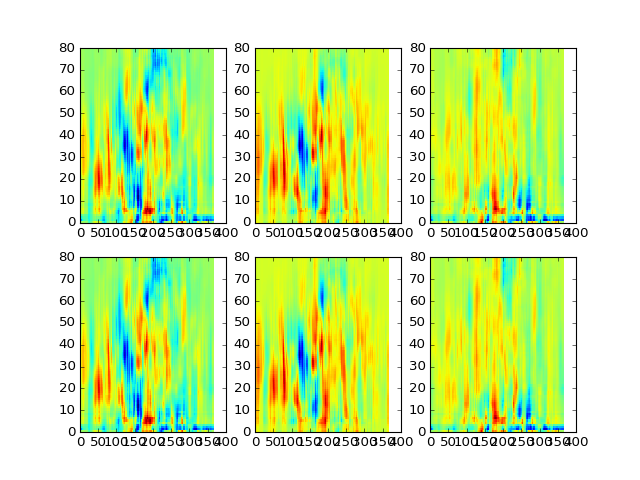

In [11]:
#sanity check that smoothing the data before and after taking the difference leads to the same outcome
plt.subplot(2, 3, 1)
plt.pcolor(smooth(P_diff_8007_5179[0],daysmth,latsmth).T)

plt.subplot(2, 3, 4)
plt.pcolor(P_diff_8007_5179_smth[0].T)

#plots also look like output from MATLAB code - looks like code works OK

plt.subplot(2, 3, 2)
plt.pcolor(smooth(P_diff_8007_5179[1],daysmth,latsmth).T)

plt.subplot(2, 3, 5)
plt.pcolor(P_diff_8007_5179_smth[1].T)

plt.subplot(2, 3, 3)
plt.pcolor(smooth(P_diff_8007_5179[2],daysmth,latsmth).T)

plt.subplot(2, 3, 6)
plt.pcolor(P_diff_8007_5179_smth[2].T)

In [12]:
## TESTING - are time series concatenated correctly?
tst = np.swapaxes(P_total,0,1)

#treat rainfall as continuous time series 
print(tst[0,0:10,0])
print(tst[0,355:365,0])
print(tst[0,0:10,1])
print(tst[0,355:365,1])

qq = tst.reshape(80,20805, order='F') #the order toggle necessary to get things to line up in the right order.
print(qq[0,0:10])
print(qq[0,355:375])
print(qq[0,710:720])

qq[0,365:375] == tst[0,0:10,1] #this is the ultimate test


[ 0.16287047  0.0271384   0.82569872  0.66484921  1.33120376  0.29985007
  0.30476177  0.09534883  0.10275705  4.05774337]
[ 0.59499989  0.14963437  1.89263684  0.53400036  0.06924683  0.13540968
  0.7251334   4.83573133  1.95146441  0.45182274]
[ 0.36267783  0.02593347  0.          0.          0.          0.          0.
  0.          0.0317068   0.        ]
[  4.14822239e+00   0.00000000e+00   7.80152297e-03   4.35331650e-01
   4.55264878e+00   9.32903123e+00   3.94087958e+00   9.85540822e-01
   3.50227410e+00   6.47314310e-01]
[ 0.16287047  0.0271384   0.82569872  0.66484921  1.33120376  0.29985007
  0.30476177  0.09534883  0.10275705  4.05774337]
[ 0.59499989  0.14963437  1.89263684  0.53400036  0.06924683  0.13540968
  0.7251334   4.83573133  1.95146441  0.45182274  0.36267783  0.02593347
  0.          0.          0.          0.          0.          0.          0.0317068
  0.        ]
[ 0.          0.          0.          0.02298308  0.          0.          0.
  0.05767269  1.52179

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [27]:
print(P_total[0,0,:])
print(np.mean(P_total,2)[0,0])
qq = P_total-np.mean(P_total,2)[:,:,np.newaxis]
print(qq[0,0,:])

[  1.62870474e-01   3.62677827e-01   4.48277779e-02   0.00000000e+00
   2.16248867e+00   6.50162816e-01   4.82561789e-02   1.48580126e-01
   1.23874845e-01   0.00000000e+00   6.37172669e-01   3.43874837e-02
   2.42252314e+00   8.01310527e+00   1.04633626e-01   1.26241390e-02
   2.08587397e-01   1.02815481e-01   1.25497118e+00   1.54965367e-01
   0.00000000e+00   1.71232866e-02   3.69172089e-01   0.00000000e+00
   8.48759953e-02   3.23387730e-03   2.25884974e-01   2.15542984e+00
   9.64549199e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   6.12265944e-01   1.41935259e+00   7.70912953e-02
   0.00000000e+00   6.24159837e+00   2.09139876e-01   4.74983282e-01
   1.36291550e-04   4.86335896e-01   0.00000000e+00   0.00000000e+00
   3.19207367e-01   0.00000000e+00   7.27936663e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   6.61151493e-02   0.00000000e+00   0.00000000e+00   2.46332522e-01
   1.01131491e-01]
0.540285569636


In [28]:
#CALCULATE AUTOCORRELATION TIMESCALE OF DAILY RAINFALL BY LATITUDE
#estimate the statistical significance of each type of change

from autocorr import autocorr #my privately generated autocorrelation function


#first step - REMOVE SEASONAL CYCLE
#must do this because otherwise the seasonal cycle provides dominant portion of autocorrelation even at long lags
P_total_noseason = P_total - np.mean(P_total,2)[:,:,np.newaxis]
P_band_noseason = P_band - np.mean(P_band,2)[:,:,np.newaxis]
P_local_noseason = P_local - np.mean(P_local,2)[:,:,np.newaxis]

#second step - arrange data properly
P_total_cont = np.swapaxes(P_total_noseason,0,1).reshape(80,20805, order='F')
P_band_cont = np.swapaxes(P_band_noseason,0,1).reshape(80,20805, order='F')
P_local_cont = np.swapaxes(P_local_noseason,0,1).reshape(80,20805, order='F')

In [43]:
autocorr(P_band_cont[40,:],20)


(array([ 1.        ,  0.34634952,  0.09960034,  0.04782263,  0.03077877,
         0.02032374,  0.02461653,  0.02738477,  0.01805724,  0.00729095,
         0.00987113,  0.01250203,  0.01912004,  0.00582251, -0.00207188,
         0.0126132 ,  0.01493283,  0.00632002,  0.01695399,  0.02933761,
         0.02503019]), 2.5453123875777024)

In [13]:
#STATISTICAL SIGNIFICANCE OF DECADAL CHANGES
#using the blocks bootstrapping algorithms I wrote, does bootstrap testing with blocks drawn accordingly

In [14]:
qq = np.arange(100)

In [15]:
qq2 = np.reshape(qq,(10,10))

In [16]:
smooth(qq2,9,9)

array([[ 46.44444444,  46.94444444,  47.44444444,  47.94444444,
         48.44444444,  49.44444444,  49.94444444,  50.44444444,
         50.94444444,  51.44444444],
       [ 45.33333333,  45.83333333,  46.33333333,  46.83333333,
         47.33333333,  48.33333333,  48.83333333,  49.33333333,
         49.83333333,  50.33333333],
       [ 44.22222222,  44.72222222,  45.22222222,  45.72222222,
         46.22222222,  47.22222222,  47.72222222,  48.22222222,
         48.72222222,  49.22222222],
       [ 43.11111111,  43.61111111,  44.11111111,  44.61111111,
         45.11111111,  46.11111111,  46.61111111,  47.11111111,
         47.61111111,  48.11111111],
       [ 42.        ,  42.5       ,  43.        ,  43.5       ,
         44.        ,  45.        ,  45.5       ,  46.        ,
         46.5       ,  47.        ],
       [ 52.        ,  52.5       ,  53.        ,  53.5       ,
         54.        ,  55.        ,  55.5       ,  56.        ,
         56.5       ,  57.        ],
       [ 5